In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_survived = df[df['Survived'] == 0]
df_survived.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [9]:
s_av = round(df_survived['Age'].mean(),2)
print(f'The average age of survived passengers was {s_av}.')

The average age of survived passengers was 30.63.


In [10]:
df_non_survived = df[df['Survived'] == 1]                           
s_n_av = round(df_non_survived['Age'].mean(),2)
print(f'The average age of drowned passengers was {s_n_av}.')

The average age of drowned passengers was 28.34.


In [11]:
aver_age  = df['Age'].mean()
df['Age'].replace(to_replace = np.nan, value = aver_age)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

<Figure size 720x360 with 0 Axes>

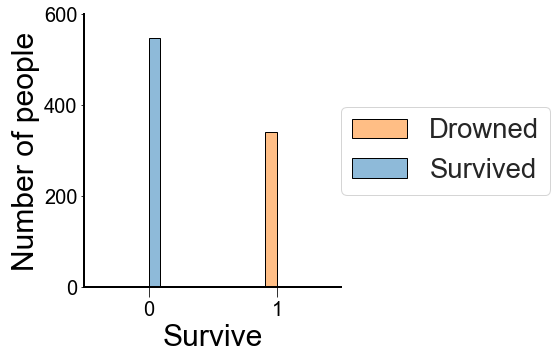

In [12]:
plt.figure(figsize=(10,5))
ax = sns.displot(df,x="Survived",hue ='Survived',legend = False)

ax.set(xlabel='Survive', ylabel='Number of people')
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("notebook", font_scale=2.5 )
#plt.grid(color='black', linestyle='solid')


# How to close the figure with lines top and left
# How to get rid of the x tick legends


ax.set(xlim=(-0.5, 1.5), ylim=(0, 600), alpha = 1, frame_on = True)
plt.legend(['Drowned','Survived'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

In [130]:
df_survived.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [131]:
survived_1st_class = df_survived[df_survived['Pclass'] == 1].shape[0]/df[df['Pclass'] == 1].shape[0]
Class_1 = df[df['Pclass'] == 1].shape[0]
surv_1_class = df_survived[df_survived['Pclass'] == 1].shape[0]
print(f'The amount of passengers in first class are {Class_1} and from them survived (Survived = 0) the {round(survived_1st_class,2)} people.')

The amount of passengers in first class are 216 and from them survived (Survived = 0) the 0.37 people.


In [132]:
df[df['Pclass'] == 1].shape[0]
df_survived[df_survived['Pclass'] == 1].shape[0]

80

In [133]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [134]:
dfg = df.groupby(['Sex','Pclass'])['Embarked'].count()
dfg


Sex     Pclass
female  1          92
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Embarked, dtype: int64

[Text(0.5, 0, 'Population')]

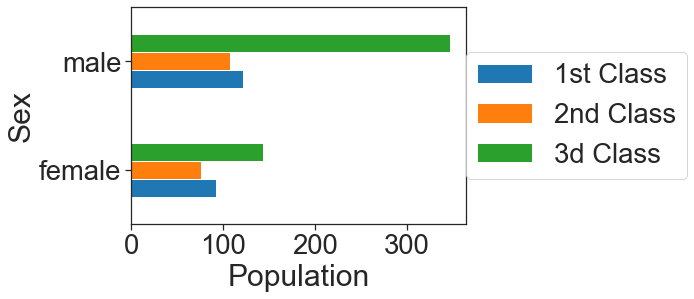

In [135]:

ax = df.groupby(['Sex','Pclass'])['Embarked'].count().unstack(1).plot.barh()
plt.legend(['1st Class','2nd Class','3d Class'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
ax.set(xlabel='Population')

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


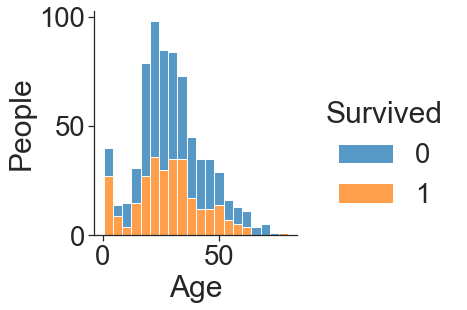

In [137]:
import seaborn as sns
ax = sns.displot(df,x="Age",hue ='Survived',multiple="stack")
ax.set(xlabel='Age', ylabel='People')


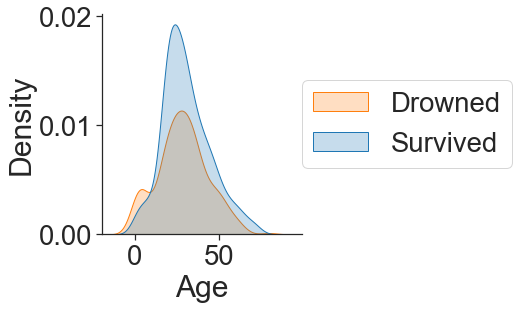

In [138]:
sns.displot(df, x="Age",hue ='Survived', kind="kde", fill=True, legend=False)
ax.set(xlabel='Age', ylabel='People')
plt.legend(['Drowned','Survived'], loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)

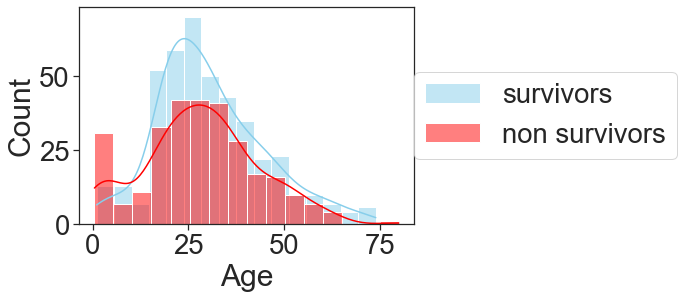

In [139]:
sns.histplot(data=df_survived, x="Age", color="skyblue", label="survivors", kde=True)
sns.histplot(data=df_non_survived, x="Age", color="red", label="non survivors", kde=True)

plt.legend() 
ax.set(xlabel='Age', ylabel='People')
plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),borderaxespad=0)
plt.show()

In [140]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
Table = df.groupby(['Survived','Sex','Pclass'])['Survived'].count()
df1= pd.DataFrame(Table, index=pd.Index(['Population'],name = 'Pop'),
                  columns=pd.MultiIndex.from_product([['Yes', 'No'],['Female', 'Male'],['1','2','3']], names=['Survived:', 'Sex:', 'P_class']))
df1.style
#

In [143]:


Table = df.groupby(['Survived','Sex','Pclass'])['Survived'].count()

pd.Table


Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Survived, dtype: int64